## 365 data science is an e-learning platform specialized in offering high quality data science courses and Tracks that would take you  from a beginner to a qualified data analyst . 365 data science is a relatively new platform with alot of strong competitors in the same industry , In this project I’m trying to reveal useful data-driven information that would increase the engagement and enrollment rate in the platform , using various analytics , visualizations and statistical tests.

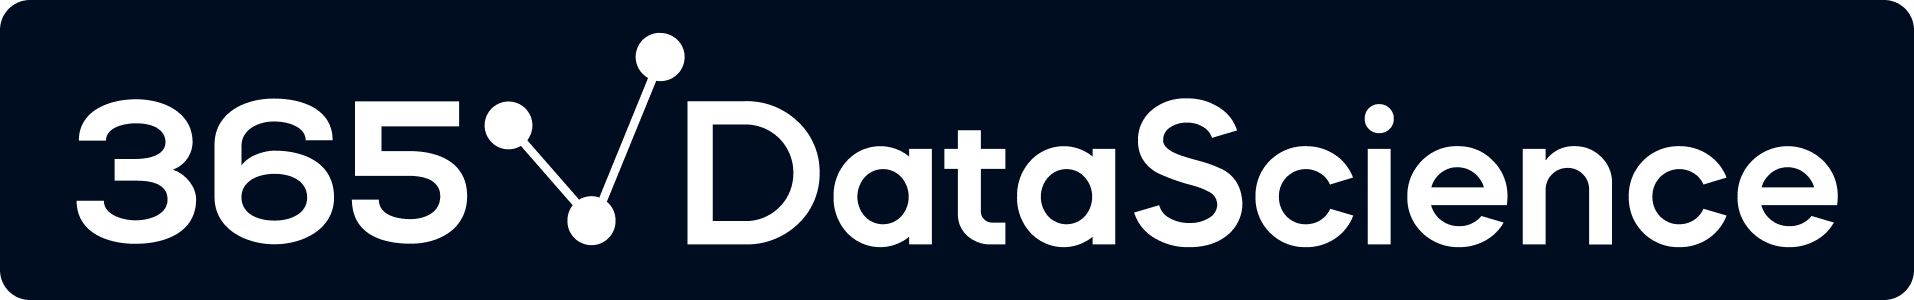

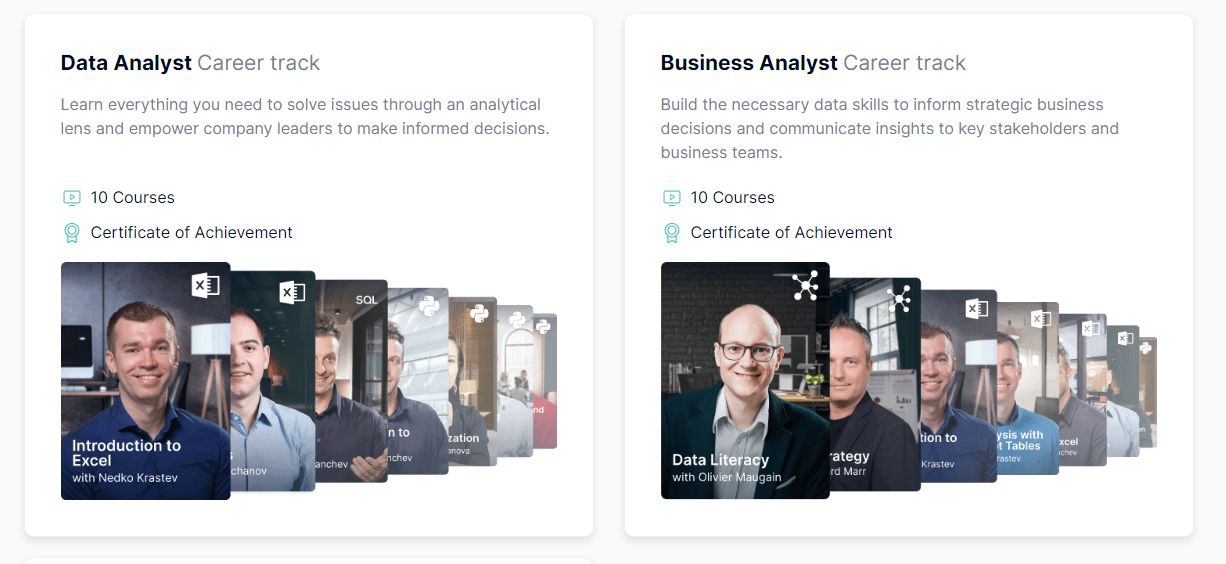

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import country_converter as coco
from statsmodels.stats.proportion import proportions_ztest, proportion_confint
import scipy.stats as stats
import statsmodels.stats.api as sms
import matplotlib as mpl
from math import ceil
sns.set_palette("Blues")

In [2]:
df1=pd.read_csv('365_course_ratings.csv')
df2=pd.read_csv('365_student_quizzes.csv')
df3=pd.read_csv('365_quiz_info.csv')
df4=pd.read_csv('365_exam_info.csv')
df5=pd.read_csv('365_course_info.csv')
df6=pd.read_csv('365_student_purchases.csv')
df7=pd.read_csv('365_student_learning.csv')
df8=pd.read_csv('365_student_info.csv')
df9=pd.read_csv('365_student_hub_questions.csv')
df10=pd.read_csv('365_student_engagement.csv')
df11=pd.read_csv('365_student_exams.csv')

In [3]:
df1.sample(1)

,course_id,student_id,course_rating,date_rated
1005,16,279482,5,2022-10-03


In [4]:
df2.sample(1)

,student_id,quiz_id,question_id,answer_id
118962,284180,309,424,1680.0


In [5]:
df3.sample(1)

,quiz_id,question_id,answer_id,answer_correct
4115,545,1046,4132,y


In [6]:
df4.sample(1)

,exam_id,exam_category,exam_duration
53,628,4,70


In [7]:
df5.sample(1)

,course_id,course_title
22,30,Git and GitHub


In [8]:
df6.sample(1)

,purchase_id,student_id,purchase_type,date_purchased
2257,21562,284487,Monthly,2022-08-10


In [9]:
df7.sample(1)

,student_id,course_id,minutes_watched,date_watched
42891,278701,24,3.4,2022-10-05


In [10]:
df8.sample(1)

,student_id,student_country,date_registered
9183,268204,ZA,2022-03-21


In [11]:
df9.sample(1)

,hub_question_id,student_id,date_question_asked
735,10163,291823,2022-10-04


In [12]:
df10.sample(1)

,engagement_id,student_id,engagement_quizzes,engagement_exams,engagement_lessons,date_engaged
17267,383811,263231,0,0,1,2022-02-21


In [13]:
df11.sample(1)

,exam_attempt_id,student_id,exam_id,exam_result,exam_completion_time,date_exam_completed
9893,198878,272199,368,33,3.77,2022-04-28


# Unifying Data & EDA

### We're starting by unifying the datasets to help us in implementing visualizations, creating the dashboard, and exploring the data efficiently.


In [13]:
# creating a list of student_ids who purchased , then mapping it to another data frame with Paid or Free values
paid_students_id=[]
for x in df6['student_id']:
    paid_students_id.append(x)
    
def paid_free(x):
    if x in paid_students_id:
        return 'Paid'
    else:
        return 'Free'
    
df8['Paid']=df8['student_id'].map(paid_free)

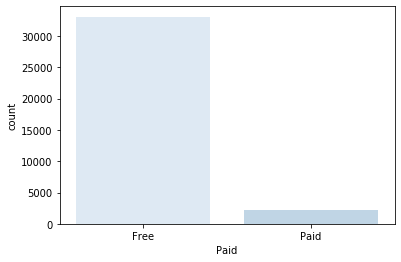

In [14]:
sns.countplot(x='Paid',data=df8)

### Most students are not PAID, What about the subscription types for these PAID students ?

In [15]:
# type of subscription for paid students
c_dict=pd.Series(df6.purchase_type.values,index=df6.student_id).to_dict()
c_dict2=pd.Series(df6.date_purchased.values,index=df6.student_id).to_dict()
df8['type']=df8['student_id'].map(c_dict)
df8['date']=df8['student_id'].map(c_dict2)

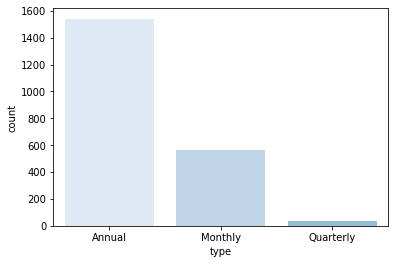

In [16]:
#Purchase types
sns.countplot(x='type',data=df8)

### Now let's take a look at engagement rates for students, An ENGAGED student is a student who has done at least one of the following:

#### 1. Watched a video
#### 2. Solved a quiz
#### 3. Attempted an exam

In [17]:
# classifying engaged vs not engaged students
engaged_student_id=[]
for x in df10['student_id']:
    engaged_student_id.append(x)

def engaged(x):
    if x in engaged_student_id:
        return 1
    else:
        return 0
    
df8['engaged']=df8['student_id'].map(engaged)

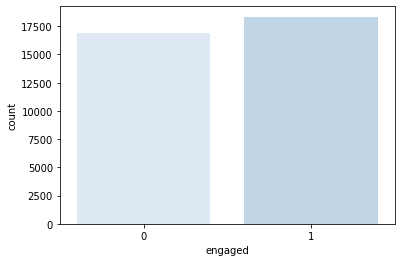

In [18]:
sns.countplot(x='engaged',data=df8)

### The percentage of engaged vs not-engaged students is nearly 50/50%, but an engaged student may have engaged 1 time or 200 times! , so let's see how the number of engagements is distributed

In [19]:
df10['sup']=1
engfr=[]
for x in df8['student_id']:
    engfr.append(df10.loc[df10['student_id'] == x, 'sup'].sum())
df8["number_of_engagments"] = engfr

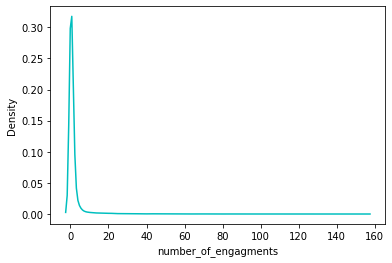

In [20]:
sns.kdeplot(data=df8, x="number_of_engagments",color='c')

In [21]:
df8['number_of_engagments'].mean()

1.8555492478001703

In [22]:
# Students with highest number of engagments
df8[df8['number_of_engagments']==df8['number_of_engagments'].max()]

,student_id,student_country,date_registered,Paid,type,date,engaged,number_of_engagments
10111,269204,PL,2022-04-01,Paid,Annual,2022-04-01,1,155


### In a single engagement session , a student may have watched a lesson, took an exam or a quiz, Or done all of them, let's see how the number of actions in a single session is distributed

In [23]:
df10['eng_value']=df10['engagement_quizzes']+df10['engagement_exams']+df10['engagement_lessons']

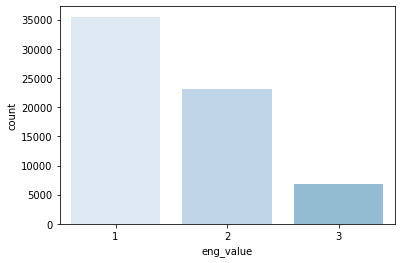

In [24]:
sns.countplot(x='eng_value',data=df10)

### As we see on average a student is engaged 1 to 15 times, Wich is not a good sign as students are not maintaining their learning rate on the platform.

### In a single engagement session, Most student only engages in a certain item either a course, exam, or quiz.

###  Now let's take a look at  student's countries distribution 

In [25]:
# Converting country code to country name for better visualization

df8['country'] = coco.convert(names=df8.student_country.tolist(), to='name_short', not_found=None)
df8 = df8.drop ('student_country',axis=1)
df8.rename(columns = {'date':'date_purchased','country':'student_country'}, inplace = True)

nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3


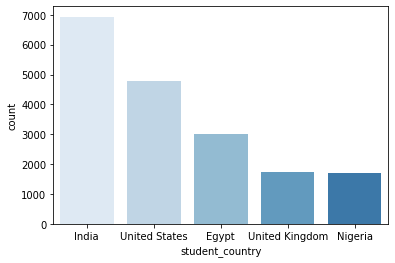

In [26]:
sns.countplot(x='student_country',data=df8, order=pd.value_counts(df8['student_country']).iloc[:5].index)

### For 365 data science to attract more audience from diffrent countries they have to offer subtitles/translation to their platform and courses, for example, @DataCamp a direct competitor for the platform, had their courses available in  English, Spanish, French, Chinese(simplified), Portuguese, German, Korean, Japanese, Russian, and Italian subtitles.

In [27]:
# reformating datatime data
df8['date_registered']=pd.to_datetime(df8['date_registered'],format='%Y/%m/%d')
df10['date_engaged']=pd.to_datetime(df10['date_engaged'],format='%Y/%m/%d')
df10['month']=df10['date_engaged'].dt.month
df8['date_registered']=pd.to_datetime(df8['date_registered'],format='%Y/%m/%d')
df8['month']=df8['date_registered'].dt.month
df8['day']=df8['date_registered'].dt.day
df10['day']=df10['date_engaged'].dt.day
df8

,student_id,date_registered,Paid,type,date_purchased,engaged,number_of_engagments,student_country,month,day
0,258798,2022-01-01,Free,NaN,NaN,1,1,India,1,1
1,258799,2022-01-01,Free,NaN,NaN,0,0,Colombia,1,1
2,258800,2022-01-01,Paid,Annual,2022-01-01,1,29,Canada,1,1
3,258801,2022-01-01,Free,NaN,NaN,0,0,India,1,1
4,258802,2022-01-01,Free,NaN,NaN,0,0,United States,1,1
...,...,...,...,...,...,...,...,...,...,...
35225,295511,2022-10-20,Free,NaN,NaN,1,1,Cameroon,10,20
35226,295512,2022-10-20,Free,NaN,NaN,1,1,Canada,10,20
35227,295513,2022-10-20,Free,NaN,NaN,1,1,Saudi Arabia,10,20
35228,295514,2022-10-20,Free,NaN,NaN,0,0,Netherlands,10,20


## Total minutes watched per course

In [28]:
# calculating total minutes watched for every course
sum_of_minutes=[]
for x in df5['course_id']:
    sum_of_minutes.append(df7.loc[df7['course_id'] == x, 'minutes_watched'].sum())
df5['total_minutes_watched'] = sum_of_minutes

In [29]:
df5

,course_id,course_title,total_minutes_watched
0,2,Introduction to Tableau,50405.5
1,3,The Complete Data Visualization Course with Py...,73659.9
2,4,Introduction to R Programming,28008.9
3,5,Data Preprocessing with NumPy,44323.8
4,7,Introduction to Data and Data Science,333265.9
5,11,Data Cleaning and Preprocessing with pandas,25412.0
6,12,Introduction to Business Analytics,13391.9
7,13,Data Analysis with Excel Pivot Tables,38021.0
8,14,SQL,234824.8
9,15,Credit Risk Modeling in Python,19716.3


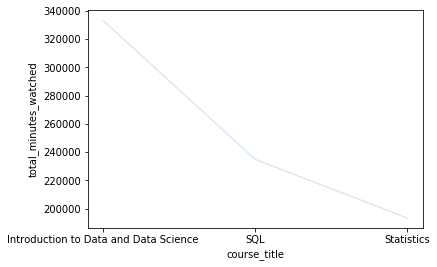

In [30]:
# Top 3 courses by minutes watched
sns.lineplot(x='course_title', y='total_minutes_watched', data=df5.nlargest(3, 'total_minutes_watched'))

## Course Average rating's

In [31]:
# calculating average rating for every course
average_course_rating=[]
for x in df5['course_id']:
    average_course_rating.append(df1.loc[df1['course_id'] == x, 'course_rating'].mean())
df5['average_course_rating'] = average_course_rating

In [32]:
df5

,course_id,course_title,total_minutes_watched,average_course_rating
0,2,Introduction to Tableau,50405.5,4.625000
1,3,The Complete Data Visualization Course with Py...,73659.9,4.705882
2,4,Introduction to R Programming,28008.9,4.880000
3,5,Data Preprocessing with NumPy,44323.8,4.903226
4,7,Introduction to Data and Data Science,333265.9,4.858392
5,11,Data Cleaning and Preprocessing with pandas,25412.0,4.622642
6,12,Introduction to Business Analytics,13391.9,4.357143
7,13,Data Analysis with Excel Pivot Tables,38021.0,4.844444
8,14,SQL,234824.8,4.816000
9,15,Credit Risk Modeling in Python,19716.3,4.705882


In [33]:
df5['average_course_rating'].mean()

4.667995504420836

## Minutes watched per student

In [34]:
minutes_watched_by_student=[]
for x in df8['student_id']:
    minutes_watched_by_student.append(df7.loc[df7['student_id'] == x, 'minutes_watched'].sum())
df8['minutes_watched_by_student']=minutes_watched_by_student

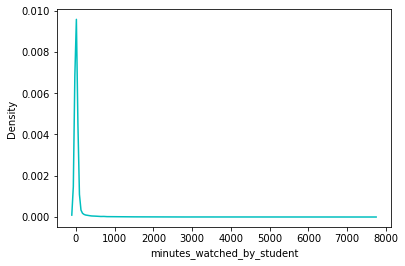

In [35]:
sns.kdeplot(data=df8, x="minutes_watched_by_student",color='c')

## Student's engagement in Q&A

In [36]:
df9['counter']=1
QA=[]
for x in df8['student_id']:
    QA.append(df9.loc[df9['student_id'] == x, 'counter'].sum())
df8['questions_asked_by_student']=QA

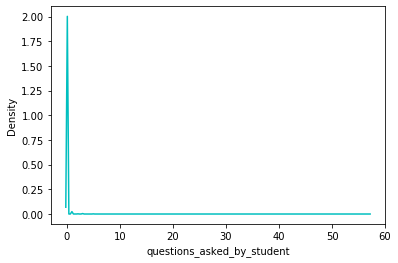

In [37]:
sns.kdeplot(data=df8, x="questions_asked_by_student",color='c')

## Exam result's

In [38]:
exam_res=[]
for x in df8['student_id']:
    exam_res.append(df11.loc[df11['student_id'] == x, 'exam_result'].mean())
df8['average_exam_result']=exam_res

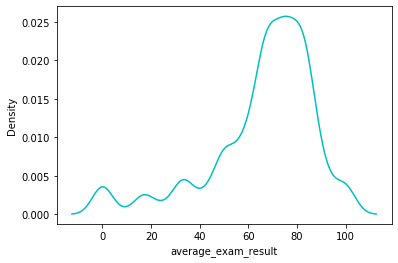

In [39]:
sns.kdeplot(data=df8, x="average_exam_result",color='c')

# Platform Gamification

### 365 Data Science recently updated the platform to a gamified version, where you can earn coins by achieving certain tasks like passing an exam, watching all lessons in a course, etc. , But how did this update affect the engagement rate of students, are they more engaged with the platform? , a good way to know this is by running an A/B test, where we take a sample of students who engaged after the update and a sample of students who engaged before the update, and see if there’s a significant difference in engagement rate or not.

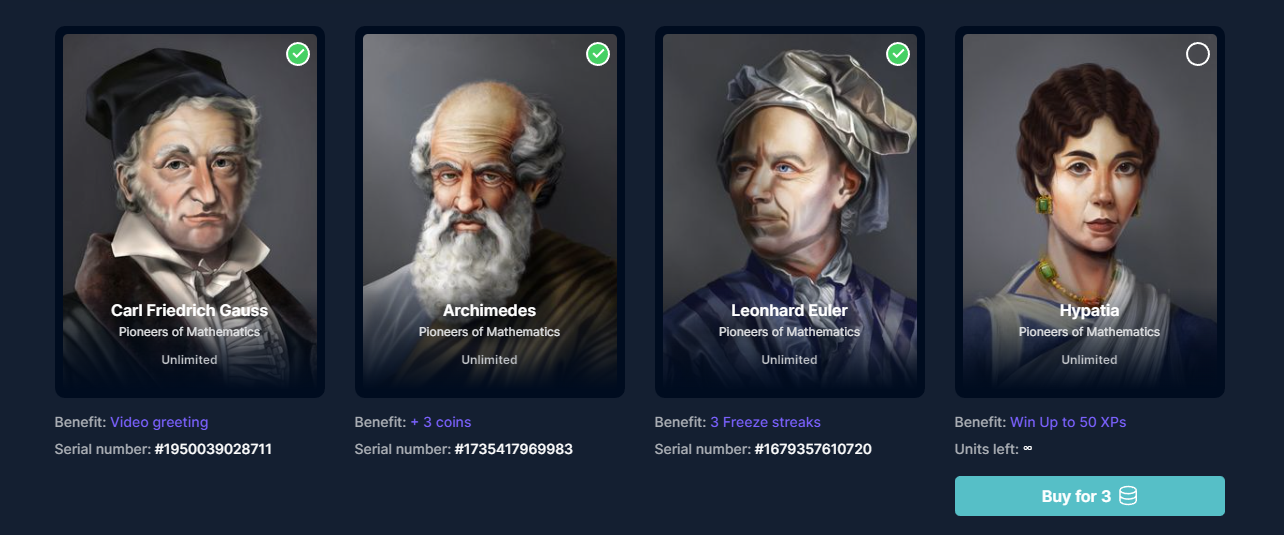

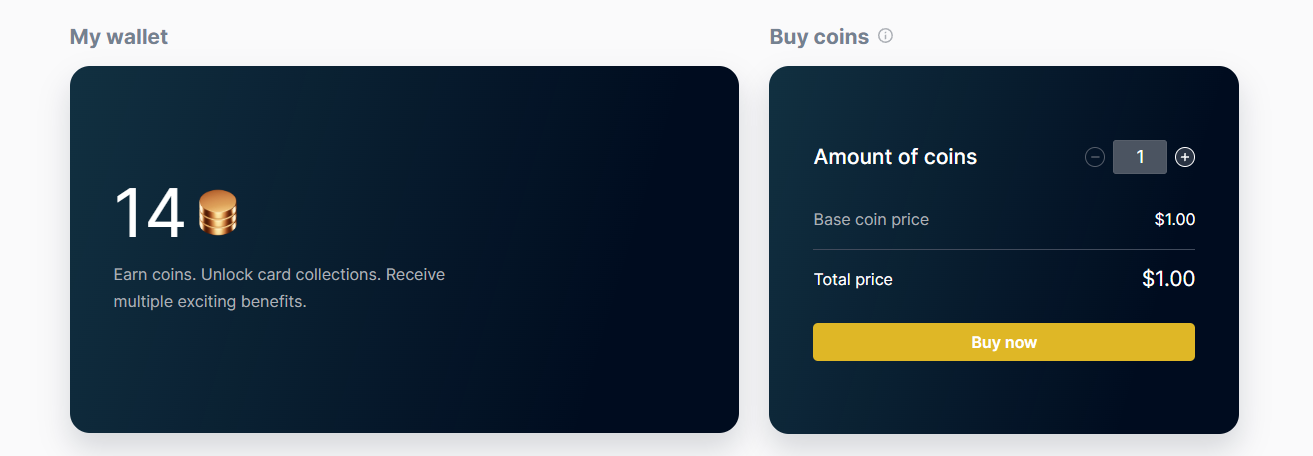

In [40]:
# Sample of studnet's engaged after the update
bb = df8.loc[(df8['month'] >= 9) &
              (df8['day'] >= 16)]
b=bb.sample(1600)

In [41]:
b

,student_id,date_registered,Paid,type,date_purchased,engaged,number_of_engagments,student_country,month,day,minutes_watched_by_student,questions_asked_by_student,average_exam_result
32100,292056,2022-09-25,Free,NaN,NaN,0,0,Brazil,9,25,0.0,0,NaN
31433,291225,2022-09-18,Free,NaN,NaN,1,1,Egypt,9,18,0.3,0,NaN
31876,291769,2022-09-23,Paid,Annual,2022-09-23,1,28,Malaysia,9,23,2487.9,1,87.617647
32234,292352,2022-09-27,Free,NaN,NaN,1,1,Hong Kong,9,27,1.4,0,NaN
32295,292425,2022-09-28,Free,NaN,NaN,1,1,Egypt,9,28,0.1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35020,295293,2022-10-19,Free,NaN,NaN,1,1,India,10,19,10.8,0,NaN
31425,291217,2022-09-18,Free,NaN,NaN,1,2,Spain,9,18,3.7,0,NaN
31129,290917,2022-09-16,Free,NaN,NaN,0,0,Indonesia,9,16,0.0,0,NaN
35023,295296,2022-10-19,Free,NaN,NaN,1,1,India,10,19,0.3,0,NaN


In [42]:
# Sample of studnet's engaged before the update
aa = df8.loc[(df8['date_registered'] < '2022-09-16')]
a=aa.sample(1600)

In [43]:
# classifying data to 0LD and New Group
a['group']='Control'
b['group']='Treatment'

In [44]:
ab_test = pd.concat([a, b], axis=0)

In [45]:
ab_test

,student_id,date_registered,Paid,type,date_purchased,engaged,number_of_engagments,student_country,month,day,minutes_watched_by_student,questions_asked_by_student,average_exam_result,group
3568,262455,2022-02-03,Free,NaN,NaN,0,0,Mexico,2,3,0.0,0,NaN,Control
19371,278823,2022-06-21,Free,NaN,NaN,1,2,Pakistan,6,21,131.7,0,94.333333,Control
29619,289357,2022-09-04,Free,NaN,NaN,0,0,India,9,4,0.0,0,NaN,Control
29244,288973,2022-09-01,Free,NaN,NaN,0,0,Bangladesh,9,1,0.0,0,NaN,Control
6286,265239,2022-02-27,Free,NaN,NaN,0,0,India,2,27,0.0,0,NaN,Control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35020,295293,2022-10-19,Free,NaN,NaN,1,1,India,10,19,10.8,0,NaN,Treatment
31425,291217,2022-09-18,Free,NaN,NaN,1,2,Spain,9,18,3.7,0,NaN,Treatment
31129,290917,2022-09-16,Free,NaN,NaN,0,0,Indonesia,9,16,0.0,0,NaN,Treatment
35023,295296,2022-10-19,Free,NaN,NaN,1,1,India,10,19,0.3,0,NaN,Treatment


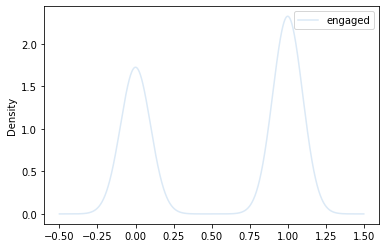

,engaged
count,3200.000000
mean,0.574063
sum,1837.000000


In [46]:
# Plotting Engagment
ab_test['engaged'].plot.kde()
plt.legend()
plt.show()

results = ab_test.agg({'engaged':['count', 'mean', 'sum']})
results

In [47]:
# calculating engagment rate for New and Old group
engagment_rates = ab_test.groupby('group')['engaged']

std_p = lambda x: np.std(x, ddof=0)              # Std. deviation of the proportion
se_p = lambda x: stats.sem(x, ddof=0)            # Std. error of the proportion (std / sqrt(n))

engagment_rates = engagment_rates.agg([np.mean, std_p, se_p])
engagment_rates.columns = ['engagment_rate', 'std_deviation', 'std_error']


engagment_rates.style.format('{:.3f}')

C:\Users\101\anaconda3\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\101\anaconda3\lib\site-packages\numpy\core\_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\101\anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,engagment_rate,std_deviation,std_error
group,,,
Control,0.484,0.500,0.012
Treatment,0.664,0.472,0.012


In [48]:
# running the test 
control_results = ab_test[ab_test['group'] == 'Control']['engaged']
treatment_results = ab_test[ab_test['group'] == 'Treatment']['engaged']
n_con = control_results.count()
n_treat = treatment_results.count()
successes = [control_results.sum(), treatment_results.sum()]
nobs = [n_con, n_treat]

z_stat, pval = proportions_ztest(successes, nobs=nobs)
(lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint(successes, nobs=nobs, alpha=0.05)

print(f'z statistic: {z_stat:.2f}')
print(f'p-value: {pval:.3f}')
print(f'ci 95% for control group: [{lower_con:.3f}, {upper_con:.3f}]')
print(f'ci 95% for treatment group: [{lower_treat:.3f}, {upper_treat:.3f}]')

z statistic: -10.33
p-value: 0.000
ci 95% for control group: [0.459, 0.508]
ci 95% for treatment group: [0.641, 0.688]


## result is statistically significant: we can reject the null hypothesis and accept the alternative , 17% increase in engagement rate
